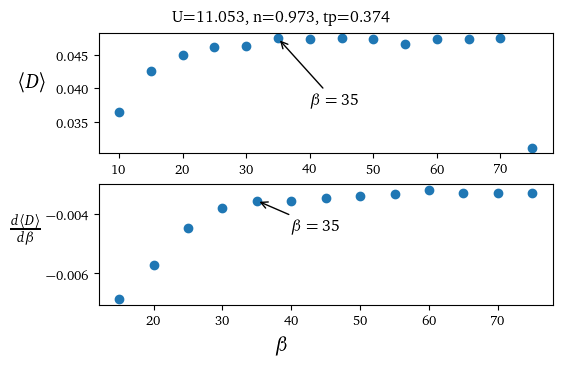

In [8]:
import numpy as np
import matplotlib.pyplot as plt


"""Produit la figure beta.pdf"""


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
fig, ax = plt.subplots(2, 1, layout="constrained")
fig.set_size_inches(14 / 2.54, 9 / 2.54)
beta_l = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
slope_l, D_l = [], []

for ind in range(len(beta_l) - 1):
    path1 = f"sol_dep/valeur_beta/beta={beta_l[ind]}_max_1bande_U=12.tsv"
    path2 = f"sol_dep/valeur_beta/beta={beta_l[ind+1]}.tsv"
    data1, data2 = np.genfromtxt(path1, names=True), np.genfromtxt(path2, names=True)
    if ind == len(beta_l) - 2:
        D_l.append(float(abs(data1["D_ave"][-1])))  
        D_l.append(float(abs(data2["D_ave"][-1])))
    else:
        D_l.append(float(abs(data1["D_ave"][-1])))
    U, n, tp = float(data1["U"][-1]), float(data1["mu_ave"][-1]), float(data1["tp"][-1])
    x1, y1 = float(beta_l[ind]), float(abs(data1["D_ave"][-1]))
    x2, y2 = float(beta_l[ind+1]), float(abs(data2["D_ave"][-1]))
    slope = (y2 - y1) / (x2 - x1)
    slope_l.append(slope)


ax[0].plot(beta_l, D_l, "o")
ax[1].plot(beta_l[1:], slope_l, "o")


x_target = 35
y_target_0 = D_l[beta_l.index(x_target)]  
y_target_1 = slope_l[beta_l[1:].index(x_target)]  


ax[0].annotate(r"$\beta=35$", xy=(x_target, y_target_0), xytext=(x_target + 5, y_target_0 - 0.01),
               arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=12)
ax[1].annotate(r"$\beta=35$", xy=(x_target, y_target_1), xytext=(x_target + 5, y_target_1 - 0.001),
               arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=12)


ax[0].set_ylabel(r"$\langle D\rangle$", rotation=0, fontsize=15, labelpad=15)
ax[1].set_ylabel(r"$\frac{d\langle D\rangle}{d\beta}$", rotation=0, fontsize=15, labelpad=15)
plt.suptitle(f"U={round(U,3)}, n={round(n,3)}, tp={round(tp,3)}", fontsize=12)
fig.supxlabel(r"$\beta$", fontsize=15)
# plt.savefig("beta.pdf")
plt.show()


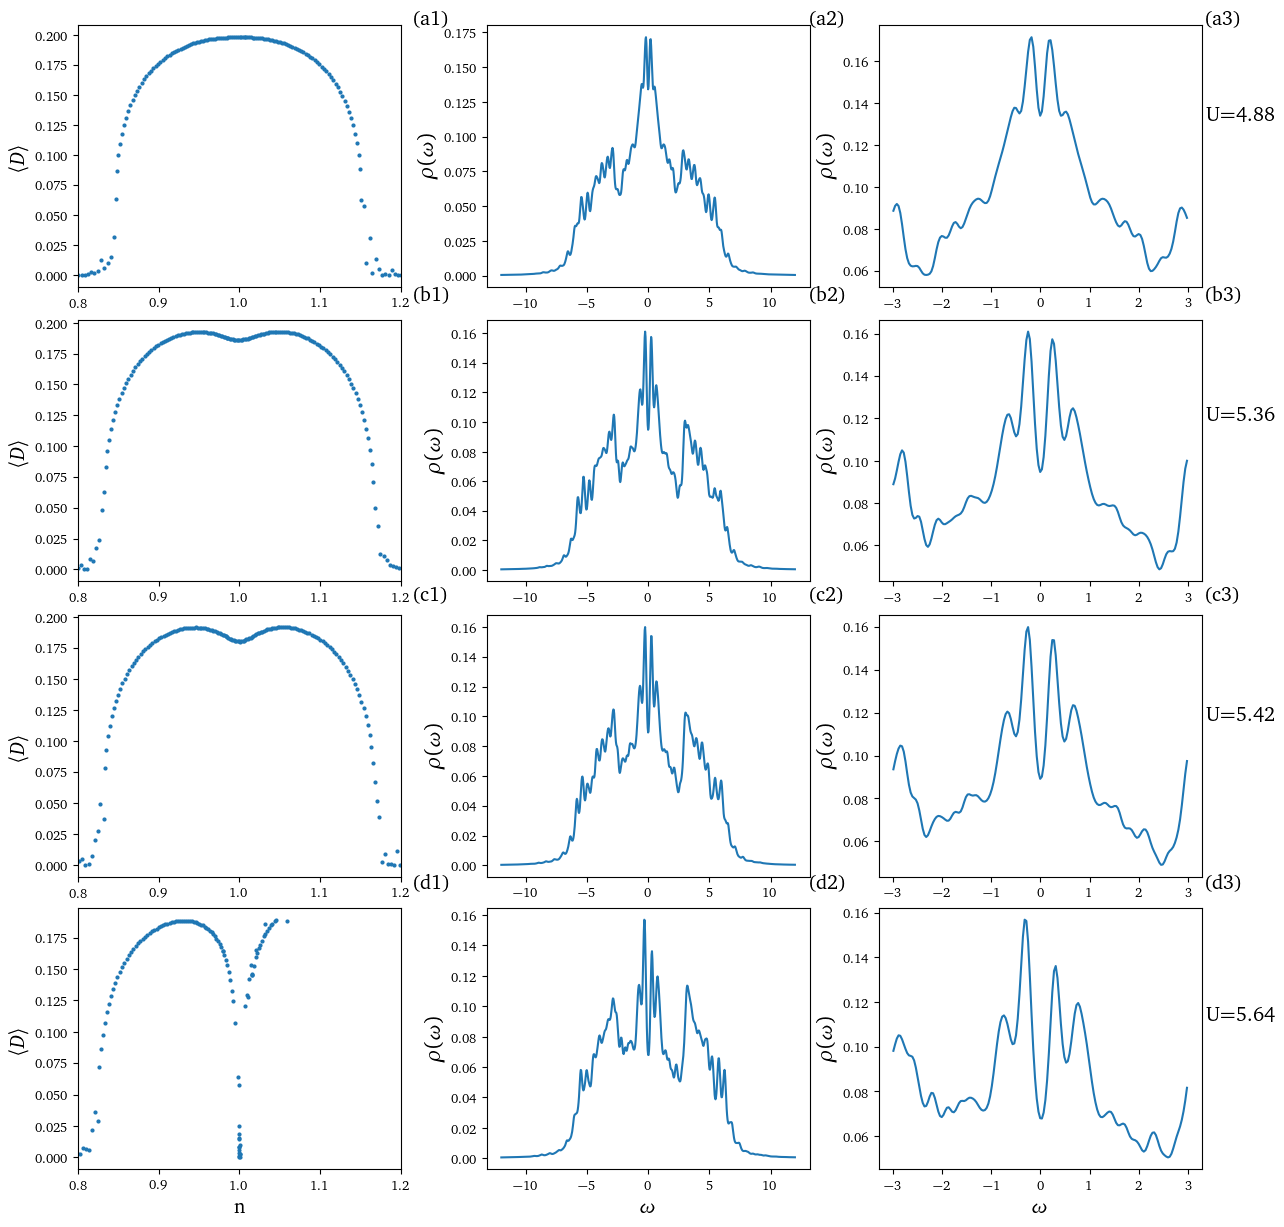

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os


"""Produit la figure domes_1bande.pdf"""


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
path1 = f"/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/boucle_1bande/boucle_mu_optim_converg_tp=0_U=5.42.tsv"
data1 = np.genfromtxt(path1,names=True)
path11 = f"/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/boucle_U_optim_converg_tp=0/U=5.41706644.tsv"
data11 = np.genfromtxt(path11,names=True)
path2 = f"/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/boucle_1bande/boucle_mu_optim_converg_tp=0_U=5.36.tsv"
data2 = np.genfromtxt(path2,names=True)
path22 = f"/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/boucle_U_optim_converg_tp=0/U=5.35706644.tsv"
data22 = np.genfromtxt(path22,names=True)
path3 = f"/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/boucle_1bande/boucle_mu_optim_converg_tp=0_U=5.64.tsv"
data3 = np.genfromtxt(path3,names=True)
path33 = f"/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/boucle_U_optim_converg_tp=0/U=5.63706644.tsv"
data33 = np.genfromtxt(path33,names=True)
path4 = f"/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/boucle_1bande/boucle_mu_optim_converg_tp=0_U=4.88.tsv"
data4 = np.genfromtxt(path4,names=True)
path44 = f"/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/boucle_U_optim_converg_tp=0/U=4.87706644.tsv"
data44 = np.genfromtxt(path44,names=True)
n1,n2,n3,n4 = data1["mu_ave"],data2["mu_ave"],data3["mu_ave"],data4["mu_ave"]
D1,D2,D3,D4 = abs(data1["D_ave"]),abs(data2["D_ave"]),abs(data3["D_ave"]),abs(data4["D_ave"])
w1,w2,w3,w4,up1,up2,up3,up4 = [],[],[],[],[],[],[],[]
w1f,w2f,w3f,w4f,up1f,up2f,up3f,up4f = [],[],[],[],[],[],[],[]
glim,plim = 12,3
for ligne in data11:
        if abs(ligne["w"]) < glim:
            w1.append(ligne["w"])
            up1.append(ligne["up_1"])
        if abs(ligne["w"]) < plim:
            w1f.append(ligne["w"])
            up1f.append(ligne["up_1"])
        else:
            continue
for ligne in data22:
        if abs(ligne["w"]) < glim:
            w2.append(ligne["w"])
            up2.append(ligne["up_1"])
        if abs(ligne["w"]) < plim:
            w2f.append(ligne["w"])
            up2f.append(ligne["up_1"])
        else:
            continue
for ligne in data33:
        if abs(ligne["w"]) < glim:
            w3.append(ligne["w"])
            up3.append(ligne["up_1"])
        if abs(ligne["w"]) < plim:
            w3f.append(ligne["w"])
            up3f.append(ligne["up_1"])
        else:
            continue
for ligne in data44:
        if abs(ligne["w"]) < glim:
            w4.append(ligne["w"])
            up4.append(ligne["up_1"])
        if abs(ligne["w"]) < plim:
            w4f.append(ligne["w"])
            up4f.append(ligne["up_1"])
        else:
            continue
fig,axs = plt.subplots(4,3,layout="constrained")
plt.gcf().set_size_inches(12,12)
# plt.gcf().set_size_inches(11/2.54,9/2.54)
axs[1][0].plot(n2,D2,"o",markersize=2)
axs[1][0].set_xlim(0.8,1.2)
axs[1][1].plot(w2,up2)
axs[1][2].plot(w2f,up2f)
axs[2][0].plot(n1,D1,"o",markersize=2)
axs[2][1].plot(w1,up1)
axs[2][2].plot(w1f,up1f)
axs[3][0].plot(n3,D3,"o",markersize=2)
axs[3][1].plot(w3,up3)
axs[3][2].plot(w3f,up3f)
axs[0][0].plot(n4,D4,"o",markersize=2)
axs[0][1].plot(w4,up4)
axs[0][2].plot(w4f,up4f)
axs[0][0].set_xlim(0.8,1.2)
axs[2][0].set_xlim(0.8,1.2)
axs[3][0].set_xlim(0.8,1.2)
axs[0][1].set_ylabel(r"$\rho(\omega)$",fontsize=15)
axs[0][2].set_ylabel(r"$\rho(\omega)$",fontsize=15)
axs[0][0].set_ylabel(r"$\langle D\rangle$",fontsize=15)
axs[1][1].set_ylabel(r"$\rho(\omega)$",fontsize=15)
axs[1][2].set_ylabel(r"$\rho(\omega)$",fontsize=15)
axs[1][0].set_ylabel(r"$\langle D\rangle$",fontsize=15)
axs[2][1].set_ylabel(r"$\rho(\omega)$",fontsize=15)
axs[2][2].set_ylabel(r"$\rho(\omega)$",fontsize=15)
axs[2][0].set_ylabel(r"$\langle D\rangle$",fontsize=15)
axs[3][1].set_ylabel(r"$\rho(\omega)$",fontsize=15)
axs[3][2].set_ylabel(r"$\rho(\omega)$",fontsize=15)
axs[3][0].set_ylabel(r"$\langle D\rangle$",fontsize=15)
axs[3][0].set_xlabel("n",fontsize=15)
axs[3][1].set_xlabel("$\omega$",fontsize=15)
axs[3][2].set_xlabel("$\omega$",fontsize=15)
fig.text(1, 0.93, "U=4.88", weight='bold', va='top', ha='left', transform=fig.transFigure,fontsize=15)
fig.text(1, 0.68, "U=5.36", weight='bold', va='top', ha='left', transform=fig.transFigure,fontsize=15)
fig.text(1, 0.43, "U=5.42", weight='bold', va='top', ha='left', transform=fig.transFigure,fontsize=15)
fig.text(1, 0.18, "U=5.64", weight='bold', va='top', ha='left', transform=fig.transFigure,fontsize=15)
fig.text(0.34, 1.01, "(a1)", weight='bold', va='top', ha='left', transform=fig.transFigure,fontsize=15)
fig.text(0.67, 1.01, "(a2)", weight='bold', va='top', ha='left', transform=fig.transFigure,fontsize=15)
fig.text(1, 1.01, "(a3)", weight='bold', va='top', ha='left', transform=fig.transFigure,fontsize=15)
fig.text(0.34, 0.78, "(b1)", weight='bold', va='top', ha='left', transform=fig.transFigure,fontsize=15)
fig.text(0.67, 0.78, "(b2)", weight='bold', va='top', ha='left', transform=fig.transFigure,fontsize=15)
fig.text(1, 0.78, "(b3)", weight='bold', va='top', ha='left', transform=fig.transFigure,fontsize=15)
fig.text(0.34, 0.53, "(c1)", weight='bold', va='top', ha='left', transform=fig.transFigure,fontsize=15)
fig.text(0.67, 0.53, "(c2)", weight='bold', va='top', ha='left', transform=fig.transFigure,fontsize=15)
fig.text(1, 0.53, "(c3)", weight='bold', va='top', ha='left', transform=fig.transFigure,fontsize=15)
fig.text(0.34, 0.29, "(d1)", weight='bold', va='top', ha='left', transform=fig.transFigure,fontsize=15)
fig.text(0.67, 0.29, "(d2)", weight='bold', va='top', ha='left', transform=fig.transFigure,fontsize=15)
fig.text(1, 0.29, "(d3)", weight='bold', va='top', ha='left', transform=fig.transFigure,fontsize=15)
# plt.savefig("domes_1bande.pdf")
plt.show()

/tmp/ipykernel_3328282/3201999472.py:65: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


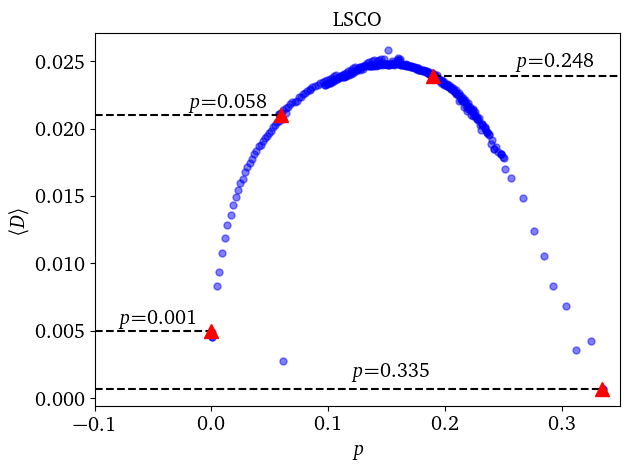

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys




"""Poduit la figure dome_supra_LSCO_PG.pdf"""



plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
path_LCO = "/home/lbsc/Data/Maîtrise_LBSC/Optimisation_propre/solutions/materiaux_3bandes/données_boucle_mu_La2CuO4_U=14.0_wc=5.tsv"
fig,ax = plt.subplots(layout="constrained")



current_file_dir ="/home/lbsc/Data/Maîtrise_LBSC/Révision_stage_2022"


data_LCO = np.genfromtxt(path_LCO, names=True)
D_L = abs(data_LCO["D_ave"])
n_p_L = 3*data_LCO['e_ave']/2
n_d_L = 3*(data_LCO['mu_ave']-data_LCO['e_ave'])
n_L = data_LCO['mu_ave']
mu_L = data_LCO['mu']
n_L = np.array(n_L)
D_L_trie = []
n_L_trie = []
points_precis = []
for x in data_LCO:
    if x["mu_ave"] < 5/3:
        D_L_trie.append(abs(x["D_ave"]))
        n_L_trie.append(x["mu_ave"])       
D_L_trie = np.array(D_L_trie)
n_L_trie = np.array(n_L_trie)
ax.plot(abs(3*n_L_trie-5),D_L_trie,"o",color = "blue",alpha=0.5,markersize=5)


max_LCO = max(D_L_trie)
listeD = [0.021,0.0007,0.02387,0.005]
ax.hlines(listeD[0],-0.1,0.06,color="black",linestyles="--")
ax.hlines(listeD[1],-0.1,0.335,color="black",linestyles="--")
ax.hlines(listeD[2],0.19,0.35,color="black",linestyles="--")
ax.hlines(listeD[3],-0.1,0,color="black",linestyles="--")
ax.plot(0.06,listeD[0],"^",color="red",markersize=10)
ax.plot(0.335,listeD[1],"^",color="red",markersize=10)
ax.plot(0.19,listeD[2],"^",color="red",markersize=10)
ax.plot(0,listeD[3],"^",color="red",markersize=10)
ax.text(-0.02,0.0215,"$p$=0.058",fontsize=15)
ax.text(0.12,0.0015,"$p$=0.335",fontsize=15)
ax.text(0.26,0.0245,"$p$=0.248",fontsize=15)
ax.text(-0.08,0.0055,"$p$=0.001",fontsize=15)
ax.tick_params(axis='both', labelsize=15)
ax.set_xlabel('$p$',fontsize=15)
ax.set_xlim(-0.1,0.35)
ax.set_ylabel(r'$\langle D\rangle$',fontsize=15)
ax.set_title("LSCO",fontsize=15)
# plt.savefig("dome_supra_LSCO_PG.pdf")


plt.tight_layout()
plt.show()

<Figure size 1653.54x314.961 with 0 Axes>

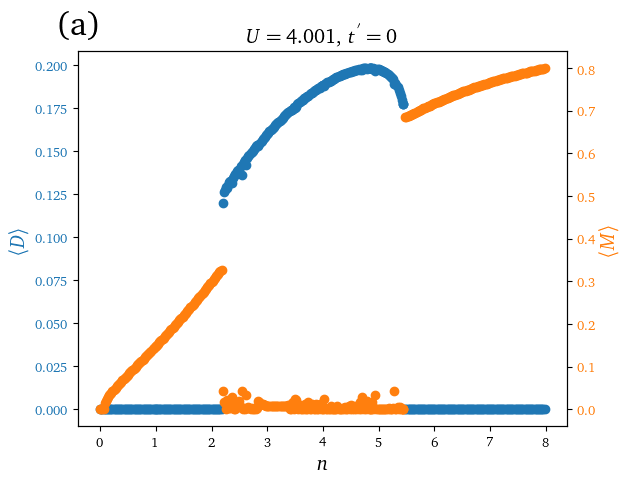

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys


"""Produit la figure AF_vs_SC_1bande.pdf"""

U_dep = 4
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
plt.gcf().set_size_inches(14/(2.54)*3,8/2.54)
path = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/boucle_1bande/boucle_U_AF_supra_1bande_4.tsv"
data = np.genfromtxt(path, names=True)


mu, tp = data["mu"], data["tp"][1]
U, D, M,n_res,n_clus = data["U"], abs(data["D_ave"]), abs(data["M_ave"]),data["mu_ave"],data["mu_1_ave"]


fig, ax1 = plt.subplots()

color1 = 'tab:blue'
ax1.set_xlabel(r'$n$',fontsize=15)
ax1.set_ylabel(r'$\langle D\rangle$', color=color1,fontsize=15)
ax1.set_title("$U=4.001$, $t^{'}=0$",fontsize=15)
ax1.plot(U, D, 'o', color=color1, label=r'$<D>$')

ax1.tick_params(axis='y', labelcolor=color1)
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel(r'$\langle M\rangle$', color=color2,fontsize=15)
ax2.plot(U, M, 'o', color=color2, label=r'$<M>$')

ax2.tick_params(axis='y', labelcolor=color2)
fig.text(0.1, 1, "(a)", weight='bold', va='top', ha='left',fontsize=25)
fig.tight_layout() 
# plt.savefig("AF_vs_SC_1bande.pdf")
plt.show()

<Figure size 1653.54x314.961 with 0 Axes>

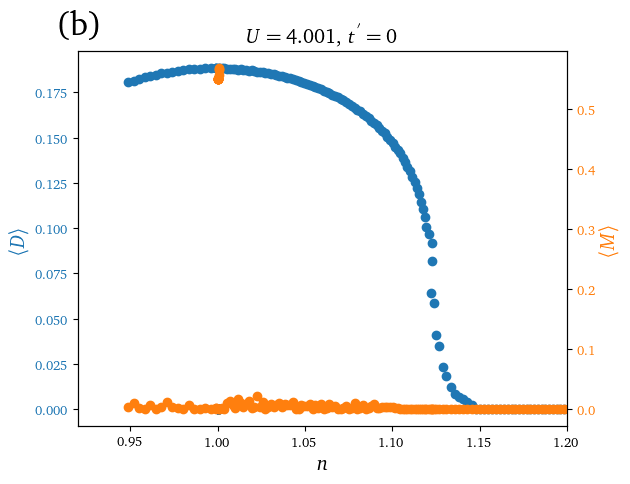

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys


"""Produit la figure AF_vs_SC_1bande_U=4.pdf"""


U_dep = 4
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
plt.gcf().set_size_inches(14/(2.54)*3,8/2.54)
path = f"/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/boucle_1bande/boucle_mu_AF_supra_1bande_U={U_dep}.tsv"
data = np.genfromtxt(path, names=True)

mu, tp = data["mu"], data["tp"][1]
U, D, M,n_res,n_clus = data["U"], abs(data["D_ave"]), abs(data["M_ave"]),data["mu_ave"],data["mu_1_ave"]


fig, ax1 = plt.subplots()


color1 = 'tab:blue'
ax1.set_xlabel(r'$n$',fontsize=15)
ax1.set_ylabel(r'$\langle D\rangle$', color=color1,fontsize=15)  
ax1.set_title("$U=4.001$, $t^{'}=0$",fontsize=15)
ax1.plot(n_res, D, 'o', color=color1, label=r'$<D>$')


ax1.tick_params(axis='y', labelcolor=color1)
ax2 = ax1.twinx()  
color2 = 'tab:orange'
ax2.set_ylabel(r'$\langle M\rangle$', color=color2,fontsize=15)
ax2.plot(n_res, M, 'o', color=color2, label=r'$<M>$')

ax2.tick_params(axis='y', labelcolor=color2)
ax1.set_xlim(0.92,1.2)
fig.text(0.1, 1, "(b)", weight='bold', va='top', ha='left',fontsize=25)
fig.tight_layout()  
# plt.savefig("AF_vs_SC_1bande_U=4.pdf")
plt.show()

<Figure size 1653.54x314.961 with 0 Axes>

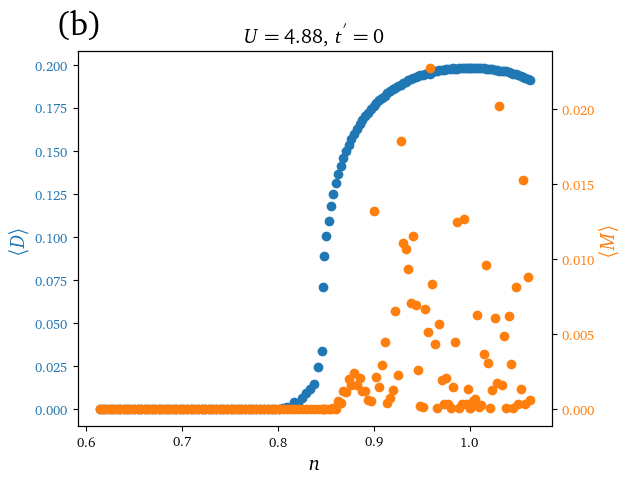

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys


"""Produit la figure AF_vs_SC_1bande_U=4.pdf"""


U_dep = 4.88
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
plt.gcf().set_size_inches(14/(2.54)*3,8/2.54)
path = f"/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/boucle_1bande/boucle_mu_AF_supra_1bande_U={U_dep}.tsv"
data = np.genfromtxt(path, names=True)

mu, tp = data["mu"], data["tp"][1]
U, D, M,n_res,n_clus = data["U"], abs(data["D_ave"]), abs(data["M_ave"]),data["mu_ave"],data["mu_1_ave"]


fig, ax1 = plt.subplots()


color1 = 'tab:blue'
ax1.set_xlabel(r'$n$',fontsize=15)
ax1.set_ylabel(r'$\langle D\rangle$', color=color1,fontsize=15)  
ax1.set_title("$U=4.88$, $t^{'}=0$",fontsize=15)
ax1.plot(n_res, D, 'o', color=color1, label=r'$<D>$')


ax1.tick_params(axis='y', labelcolor=color1)
ax2 = ax1.twinx()  
color2 = 'tab:orange'
ax2.set_ylabel(r'$\langle M\rangle$', color=color2,fontsize=15)
ax2.plot(n_res, M, 'o', color=color2, label=r'$<M>$')

ax2.tick_params(axis='y', labelcolor=color2)
# ax1.set_xlim(0.92,1.2)
fig.text(0.1, 1, "(b)", weight='bold', va='top', ha='left',fontsize=25)
fig.tight_layout()  
# plt.savefig("AF_vs_SC_1bande_U=4.pdf")
plt.show()

<Figure size 1653.54x314.961 with 0 Axes>

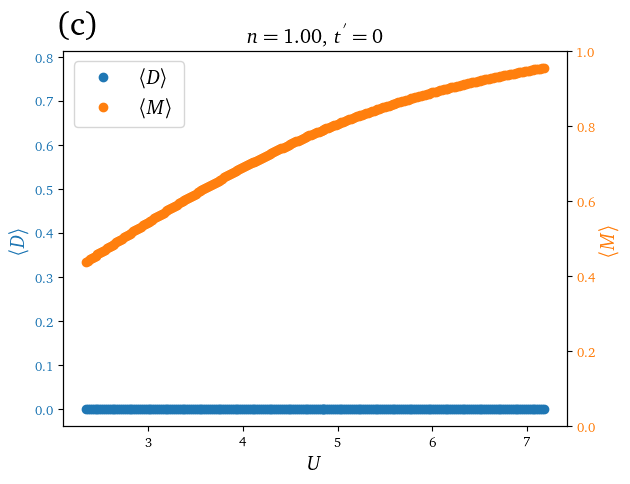

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from matplotlib.patches import Ellipse

"""Produit la figure AF_vs_SC_1bande_sym_part_trou.pdf"""

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
plt.gcf().set_size_inches(14/(2.54)*3,8/2.54)
path = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/boucle_1bande/boucle_U_AF_supra_1bande_bain_contrainte.tsv"
path = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/boucle_1bande/boucle_U_AF_supra_1bande_bain_contrainte3.tsv"
data = np.genfromtxt(path, names=True)


mu, tp = data["mu"][1], data["tp"][1]
U, D, M,n_res,n_clus = data["U"], abs(data["D_ave"]), abs(data["M_ave"]),data["mu_ave"],data["mu_1_ave"]


fig, ax1 = plt.subplots()
ax1.set_title("$n=1.00$, $t^{'}=0$",fontsize=15)
color1 = 'tab:blue'
ax1.set_xlabel(r'$U$',fontsize=15)
ax1.set_ylabel(r'$\langle D\rangle$',fontsize=15,color=color1)
ax1.plot(U, D, 'o', color=color1, label=r'$\langle D\rangle$')
ax1.tick_params(axis='y', labelcolor=color1)
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel(r'$\langle M\rangle$', color=color2,fontsize=15)
ax1.plot(U, M, 'o', color=color2, label=r'$\langle M\rangle$')
ax2.tick_params(axis='y', labelcolor=color2)
ax1.legend(fontsize=15)
fig.text(0.1, 1, "(c)", weight='bold', va='top', ha='left',fontsize=25)
fig.tight_layout()
# plt.savefig("AF_vs_SC_1bande_sym_part_trou.pdf")
plt.show()

<Figure size 551.181x314.961 with 0 Axes>

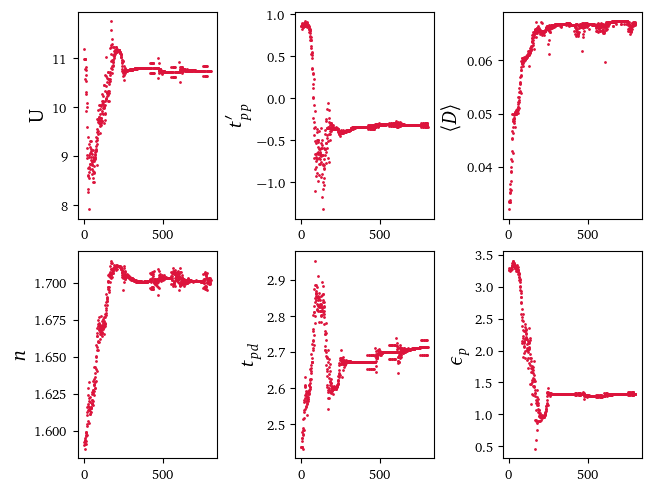

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from points_depart_3bandes_trous import Dico_dep


"""Produit la figure Optim_3bandes_best.pdf"""


colors = [
    'b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green',
    'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
    'blue', 'lime', 'crimson', 'teal', 'indigo', 'gold', 'darkred', 'darkblue', 'darkgreen',
    'darkorange', 'deeppink', 'deepskyblue', 'firebrick', 'forestgreen', 'fuchsia', 'gray', 'peru'
]

color_dict = {i+1: colors[i] for i in range(34)}



plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
plt.gcf().set_size_inches(14/2.54,8/2.54)
dico_couleurs = {}
fig,axs = plt.subplots(2,3,layout='constrained')
liste_U,liste_n,liste_tpd,liste_tppp,liste_e = [],[],[],[],[]
marker_size=1
liste = [20]
for x in liste:
    # print(x)
    dep = Dico_dep[x]
    try:
        path = f"/net/nfs-iq/home/lbsc/Data/Maîtrise_LBSC/Optimisation_propre/solutions/Optimisation_3bandes/3bandes_4dec_24_{dep}"
        path2 = f"/net/nfs-iq/home/lbsc/Data/Maîtrise_LBSC/Optimisation_propre/solutions/Optimisation_3bandes/3bandes_20dec_24_{dep}"
        data2 = np.genfromtxt(path2,names=True)
        data = np.genfromtxt(path,names=True)
        if abs(data["D_ave"][-52]) < 0.02:
            print(x)
            continue
        if abs(data2["D_ave"][-52]) < 0.02:
            print(x)
            continue
    except:
        continue
    liste_U.append((data["U"][0],data["U"][-1]))
    liste_n.append((data["mu_ave"][0],data["mu_ave"][-1]))
    liste_tpd.append((data["tpd"][0],data["tpd"][-1]))
    liste_tppp.append((data["tppp"][0],data["tppp"][-1]))
    liste_e.append((data["e"][0],data["e"][-1]))
    if data2["mu_ave"][-52] < 1.67:
        continue
    if data2["mu_ave"][-52] > 1.72:
        continue
    axs[0][0].plot(data2["U"],"o",label=dep,ms=marker_size,color=color_dict[x])
    axs[0][0].set_ylabel("U",fontsize=15)
    # axs[1][0].plot((data2["mu_ave"]-(5/3))*3,"o",ms=marker_size,color=color_dict[x])
    axs[1][0].plot(data2["mu_ave"],"o",ms=marker_size,color=color_dict[x])
    axs[1][0].set_ylabel("$n$",fontsize=15)
    axs[1][1].plot(data2["tpd"],"o",ms=marker_size,color=color_dict[x])
    axs[1][1].set_ylabel("$t_{pd}$",fontsize=15)
    axs[0][1].plot(data2["tppp"],"o",ms=marker_size,color=color_dict[x])
    axs[0][1].set_ylabel("$t_{pp}'$",fontsize=15)
    axs[1][2].plot(data2["e"],"o",ms=marker_size,color=color_dict[x])
    axs[1][2].set_ylabel("$\epsilon_p$",fontsize=15)
    axs[0][2].plot(abs(data2["D_ave"]),"o",ms=marker_size,color=color_dict[x])
    axs[0][2].set_ylabel(r"$\langle D\rangle$",fontsize=15)


# plt.savefig("Optim_3bandes_best_seminaire.pdf")
plt.savefig("Optim_3bandes_best.pdf")
plt.show()

17
28
32


<Figure size 551.181x314.961 with 0 Axes>

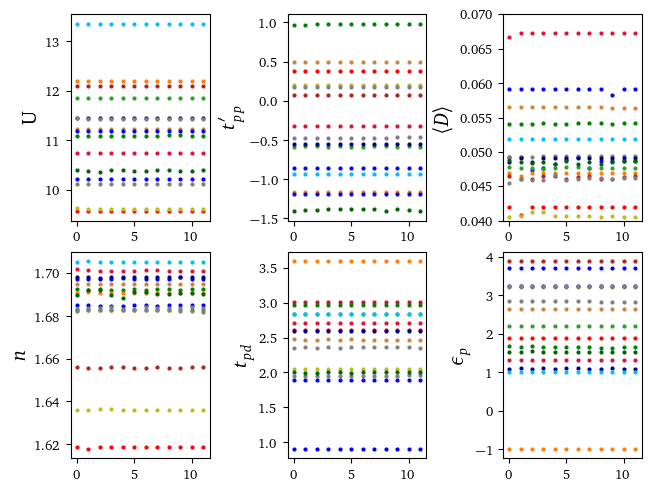

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from points_depart_3bandes_trous import Dico_dep


"""Produit la figure Optim_3bandes.pdf"""


colors = [
    'b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green',
    'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
    'blue', 'lime', 'crimson', 'teal', 'indigo', 'gold', 'darkred', 'darkblue', 'darkgreen',
    'darkorange', 'deeppink', 'deepskyblue', 'firebrick', 'forestgreen', 'fuchsia', 'gray', 'peru'
]

color_dict = {i+1: colors[i] for i in range(34)}



plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
plt.gcf().set_size_inches(14/2.54,8/2.54)
dico_couleurs = {}
fig,axs = plt.subplots(2,3,layout='constrained')
liste_U,liste_n,liste_tpd,liste_tppp,liste_e = [],[],[],[],[]
liste = [34,1,2,3,9,10,15,16,18,20,25,26,28,29,30,32,33]
print(len(liste))
marker_size=2
for x in liste:
    dep = Dico_dep[x]
    try:
        path = f"/net/nfs-iq/home/lbsc/Data/Maîtrise_LBSC/Optimisation_propre/solutions/Optimisation_3bandes/3bandes_4dec_24_{dep}"
        path2 = f"/net/nfs-iq/home/lbsc/Data/Maîtrise_LBSC/Optimisation_propre/solutions/Optimisation_3bandes/3bandes_20dec_24_{dep}"
        data2 = np.genfromtxt(path2,names=True)
        data = np.genfromtxt(path,names=True)
        if abs(data["D_ave"][-52]) < 0.02:
            print(x)
            continue
        if abs(data2["D_ave"][-52]) < 0.02:
            print(x)
            continue
    except:
        continue
    liste_U.append((data["U"][0],data["U"][-1]))
    liste_n.append((data["mu_ave"][0],data["mu_ave"][-1]))
    liste_tpd.append((data["tpd"][0],data["tpd"][-1]))
    liste_tppp.append((data["tppp"][0],data["tppp"][-1]))
    liste_e.append((data["e"][0],data["e"][-1]))
    axs[0][0].plot(data2["U"][-62:-50],"o",label=dep,ms=marker_size,color=color_dict[x])
    axs[0][0].set_ylabel("U",fontsize=15)
    # axs[1][0].plot((data2["mu_ave"][-62:-50]-(5/3))*3,"o",ms=marker_size,color=color_dict[x])
    axs[1][0].plot(data2["mu_ave"][-62:-50],"o",ms=marker_size,color=color_dict[x])
    axs[1][0].set_ylabel("$n$",fontsize=15)
    axs[1][1].plot(data2["tpd"][-62:-50],"o",ms=marker_size,color=color_dict[x])
    axs[1][1].set_ylabel("$t_{pd}$",fontsize=15)
    axs[0][1].plot(data2["tppp"][-62:-50],"o",ms=marker_size,color=color_dict[x])
    axs[0][1].set_ylabel("$t_{pp}'$",fontsize=15)
    axs[1][2].plot(data2["e"][-62:-50],"o",ms=marker_size,color=color_dict[x])
    axs[1][2].set_ylabel("$\epsilon_p$",fontsize=15)
    axs[0][2].plot(abs(data2["D_ave"][-62:-50]),"o",ms=marker_size,color=color_dict[x])
    axs[0][2].set_ylabel(r"$\langle D\rangle$",fontsize=15)
    axs[0][2].set_ylim(0.040,0.07)

# plt.savefig("Optim_3bandes.pdf")
# plt.savefig("Optim_3bandes_seminaire.pdf")
plt.show()

'Les données des solutions CDMFT sont dans le dossier test'

<Figure size 551.181x314.961 with 0 Axes>

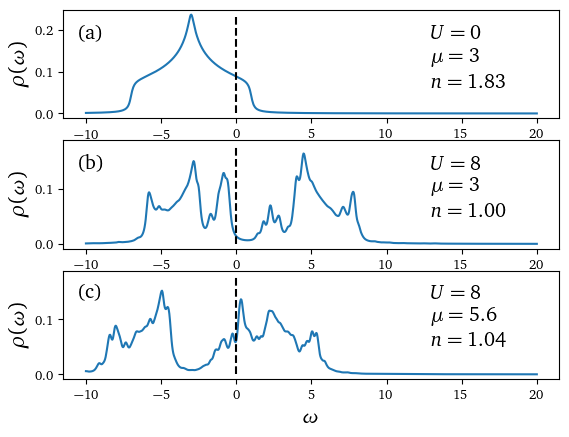

In [18]:
import numpy as np
import matplotlib.pyplot as plt

"""produit la figure mott_insulator.pdf"""

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
plt.gcf().set_size_inches(14/2.54,8/2.54)

path1 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/quick/U=8_mu=5.6_t=1_tp=0.tsv"
data1 = np.genfromtxt(path1,names=True)
path2 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/quick/U=8_mu=3_t=1_tp=0.tsv"
data2 = np.genfromtxt(path2,names=True)
path3 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/quick/U=0_mu=3_t=1_tp=0.tsv"
data3 = np.genfromtxt(path3,names=True)

fig,ax = plt.subplots(3,1)

ax[2].set_xlabel("$\omega$",fontsize=15)
ax[0].set_ylabel(r"$\rho(\omega)$",fontsize=15)
ax[1].set_ylabel(r"$\rho(\omega)$",fontsize=15)
ax[2].set_ylabel(r"$\rho(\omega)$",fontsize=15)

ax[0].plot(data3["w"],data3["up_1"])
ax[0].vlines(0,0,0.23,linestyle="--",color="black")
ax[1].plot(data2["w"],data2["up_1"])
ax[1].vlines(0,0,0.18,linestyle="--",color="black")
ax[2].plot(data1["w"],data1["up_1"])
ax[2].vlines(0,0,0.18,linestyle="--",color="black")


fig.text(0.7, 0.85, "$U=0$", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.7, 0.8, "$\mu=3$", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.7, 0.75, "$n=1.83$", weight='bold', va='top', ha='left',fontsize=15)


fig.text(0.7, 0.58, "$U=8$", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.7, 0.53, "$\mu=3$", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.7, 0.48, "$n=1.00$", weight='bold', va='top', ha='left',fontsize=15)

fig.text(0.7, 0.31, "$U=8$", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.7, 0.26, "$\mu=5.6$", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.7, 0.21, "$n=1.04$", weight='bold', va='top', ha='left',fontsize=15)


fig.text(0.15, 0.85, "(a)", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.15, 0.58, "(b)", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.15, 0.31, "(c)", weight='bold', va='top', ha='left',fontsize=15)


"""Les données des solutions CDMFT sont dans le dossier test"""

# plt.savefig("mott_insulator.pdf")

<Figure size 551.181x314.961 with 0 Axes>

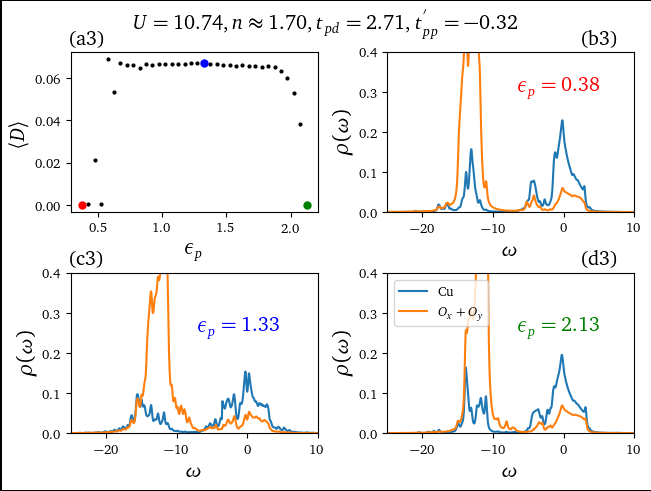

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
plt.gcf().set_size_inches(14/2.54,8/2.54)

path1 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/boucles_3bandes/boucle_e_3bande_max_U=10.975,mu=9.823,tpd=2.437,tppp=0.861,e=3.26.tsv"
data1 = np.genfromtxt(path1,names=True)
path2 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/boucle_e_3bande_max_U=10.975,mu=9.823,tpd=2.437,tppp=0.861,e=3.26/e=0.38_n=1.70.tsv"
data2 = np.genfromtxt(path2,names=True)
path3 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/boucle_e_3bande_max_U=10.975,mu=9.823,tpd=2.437,tppp=0.861,e=3.26/e=1.3251661.tsv"
data3 = np.genfromtxt(path3,names=True)
path4 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/boucle_e_3bande_max_U=10.975,mu=9.823,tpd=2.437,tppp=0.861,e=3.26/e=2.13_n=1.70.tsv"
data4 = np.genfromtxt(path4,names=True)


fig,axs = plt.subplots(2,2,layout="constrained")

axs[0][0].plot(data1["e"],abs(data1["D_ave"]),"o",markersize=2,color="black")
axs[0][0].set_xlabel("$\epsilon_p$",fontsize=15)
axs[0][0].set_ylabel(r"$\langle D\rangle$",fontsize=15)
axs[0][0].plot(1.325,0.0672,"o",color="blue",markersize=5)
axs[0][0].plot(0.375,0.0002689,"o",color="red",markersize=5)
axs[0][0].plot(2.125,0.00014,"o",color="green",markersize=5)
# axs[0][0].plot(2.125,0.0001478,"o",color="green",markersize=5)


axs[0][1].plot(data2["w"],data2["up_1"],label="Cu")
axs[0][1].plot(data2["w"],data2["up_2"]+data2["up_3"],label="$O_x+O_y$")
axs[0][1].set_ylim(0,0.4)
axs[0][1].set_xlim(-25,10)
axs[0][1].set_xlabel("$\omega$",fontsize=15)
axs[0][1].set_ylabel(r"$\rho(\omega)$",fontsize=15)

axs[1][0].plot(data3["w"],data3["up_1"],label="Cu")
axs[1][0].plot(data3["w"],data3["up_2"]+data3["up_3"],label="$O_x+O_y$")
axs[1][0].set_ylim(0,0.4)
axs[1][0].set_xlim(-25,10)
axs[1][0].set_xlabel("$\omega$",fontsize=15)
axs[1][0].set_ylabel(r"$\rho(\omega)$",fontsize=15)

axs[1][1].plot(data4["w"],data4["up_1"],label="Cu")
axs[1][1].plot(data4["w"],data4["up_2"]+data4["up_3"],label="$O_x+O_y$")
axs[1][1].set_ylim(0,0.4)
axs[1][1].set_xlim(-25,10)
axs[1][1].set_xlabel("$\omega$",fontsize=15)
axs[1][1].set_ylabel(r"$\rho(\omega)$",fontsize=15)
axs[1][1].legend(loc=2)



fig.text(0.8, 0.85, "$\epsilon_p=0.38$", weight='bold', va='top', ha='left',fontsize=15,color="red")
fig.text(0.3, 0.35, "$\epsilon_p=1.33$", weight='bold', va='top', ha='left',fontsize=15,color="blue")
fig.text(0.8, 0.35, "$\epsilon_p=2.13$", weight='bold', va='top', ha='left',fontsize=15,color="green")
fig.text(0.1, 0.95, "(a3)", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.9, 0.95, "(b3)", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.1, 0.49, "(c3)", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.9, 0.49, "(d3)", weight='bold', va='top', ha='left',fontsize=15)
fig.suptitle(r"$U=10.74,n\approx 1.70,t_{pd}=2.71,t_{pp}^{'}=-0.32$",fontsize=15)
fig.patch.set_linewidth(2)
fig.patch.set_edgecolor("black")
# plt.savefig("boucle_e_max_Emery.pdf")



<Figure size 551.181x314.961 with 0 Axes>

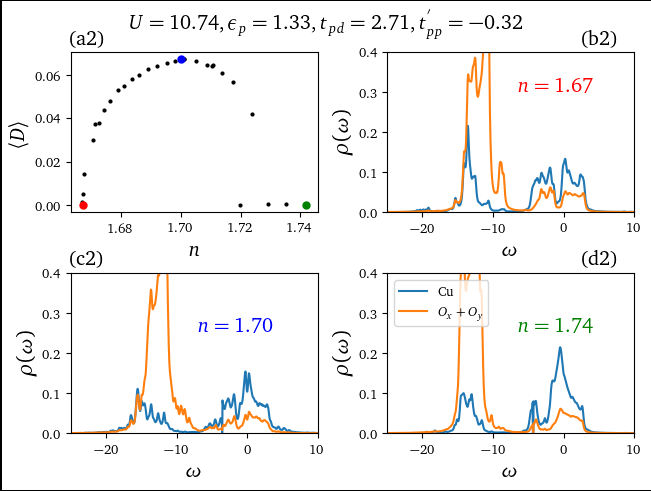

In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
plt.gcf().set_size_inches(14/2.54,8/2.54)

path1 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/boucles_3bandes/boucle_mu_3bande_max_U=10.975,mu=9.823,tpd=2.437,tppp=0.861,e=3.26.tsv"
data1 = np.genfromtxt(path1,names=True)
path2 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/boucle_mu_3bande_max_U=10.975,mu=9.823,tpd=2.437,tppp=0.861,e=3.26/mu=11.38900182.tsv"
data2 = np.genfromtxt(path2,names=True)
path3 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/boucle_mu_3bande_max_U=10.975,mu=9.823,tpd=2.437,tppp=0.861,e=3.26/mu=12.23900182.tsv"
data3 = np.genfromtxt(path3,names=True)
path4 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/boucle_mu_3bande_max_U=10.975,mu=9.823,tpd=2.437,tppp=0.861,e=3.26/mu=12.78900182.tsv"
data4 = np.genfromtxt(path4,names=True)


fig,axs = plt.subplots(2,2,layout="constrained")

axs[0][0].plot(data1["mu_ave"],abs(data1["D_ave"]),"o",markersize=2,color="black")
axs[0][0].set_xlabel("$n$",fontsize=15)
axs[0][0].set_ylabel(r"$\langle D\rangle$",fontsize=15)
axs[0][0].plot(1.70,0.0672,"o",color="blue",markersize=5)
axs[0][0].plot(1.667,0.0002689,"o",color="red",markersize=5)
axs[0][0].plot(1.742,0.0001452,"o",color="green",markersize=5)


axs[0][1].plot(data2["w"],data2["up_1"],label="Cu")
axs[0][1].plot(data2["w"],data2["up_2"]+data2["up_3"],label="$O_x+O_y$")
axs[0][1].set_ylim(0,0.4)
axs[0][1].set_xlim(-25,10)
axs[0][1].set_xlabel("$\omega$",fontsize=15)
axs[0][1].set_ylabel(r"$\rho(\omega)$",fontsize=15)

axs[1][0].plot(data3["w"],data3["up_1"],label="Cu")
axs[1][0].plot(data3["w"],data3["up_2"]+data3["up_3"],label="$O_x+O_y$")
axs[1][0].set_ylim(0,0.4)
axs[1][0].set_xlim(-25,10)
axs[1][0].set_xlabel("$\omega$",fontsize=15)
axs[1][0].set_ylabel(r"$\rho(\omega)$",fontsize=15)

axs[1][1].plot(data4["w"],data4["up_1"],label="Cu")
axs[1][1].plot(data4["w"],data4["up_2"]+data4["up_3"],label="$O_x+O_y$")
axs[1][1].set_ylim(0,0.4)
axs[1][1].set_xlim(-25,10)
axs[1][1].set_xlabel("$\omega$",fontsize=15)
axs[1][1].set_ylabel(r"$\rho(\omega)$",fontsize=15)
axs[1][1].legend(loc=2)


fig.text(0.8, 0.85, "$n=1.67$", weight='bold', va='top', ha='left',fontsize=15,color="red")
fig.text(0.3, 0.35, "$n=1.70$", weight='bold', va='top', ha='left',fontsize=15,color="blue")
fig.text(0.8, 0.35, "$n=1.74$", weight='bold', va='top', ha='left',fontsize=15,color="green")
fig.text(0.1, 0.95, "(a2)", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.9, 0.95, "(b2)", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.1, 0.49, "(c2)", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.90, 0.49, "(d2)", weight='bold', va='top', ha='left',fontsize=15)
fig.suptitle(r"$U=10.74,\epsilon_p= 1.33,t_{pd}=2.71,t_{pp}^{'}=-0.32$",fontsize=15)
fig.patch.set_linewidth(2)
fig.patch.set_edgecolor("black")
# plt.savefig("boucle_n_max_Emery.pdf")

<Figure size 551.181x314.961 with 0 Axes>

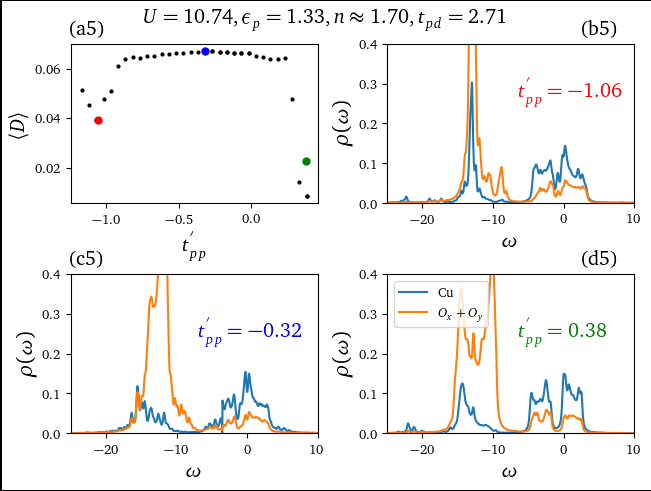

In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
plt.gcf().set_size_inches(14/2.54,8/2.54)

path1 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/boucles_3bandes/boucle_tppp_3bande_max_U=10.975,mu=9.823,tpd=2.437,tppp=0.861,e=3.26.tsv"
data1 = np.genfromtxt(path1,names=True)
path2 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/boucle_tppp_3bande_max_U=10.975,mu=9.823,tpd=2.437,tppp=0.861,e=3.26/tppp=-1.068924249.tsv"
data2 = np.genfromtxt(path2,names=True)
path3 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/boucle_tppp_3bande_max_U=10.975,mu=9.823,tpd=2.437,tppp=0.861,e=3.26/tppp=-0.318924249.tsv"
data3 = np.genfromtxt(path3,names=True)
path4 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/boucle_tppp_3bande_max_U=10.975,mu=9.823,tpd=2.437,tppp=0.861,e=3.26/tppp=0.38_n=1.70.tsv"
data4 = np.genfromtxt(path4,names=True)


fig,axs = plt.subplots(2,2,layout="constrained")

axs[0][0].plot(data1["tppp"],abs(data1["D_ave"]),"o",markersize=2,color="black")
axs[0][0].set_xlabel("$t_{pp}^{'}$",fontsize=15)
axs[0][0].set_ylabel(r"$\langle D\rangle$",fontsize=15)
axs[0][0].plot(-0.32,0.0672,"o",color="blue",markersize=5)
axs[0][0].plot(-1.06,0.03921,"o",color="red",markersize=5)
axs[0][0].plot(0.38,0.02286,"o",color="green",markersize=5)


axs[0][1].plot(data2["w"],data2["up_1"],label="Cu")
axs[0][1].plot(data2["w"],data2["up_2"]+data2["up_3"],label="$O_x+O_y$")
axs[0][1].set_ylim(0,0.4)
axs[0][1].set_xlim(-25,10)
axs[0][1].set_xlabel("$\omega$",fontsize=15)
axs[0][1].set_ylabel(r"$\rho(\omega)$",fontsize=15)

axs[1][0].plot(data3["w"],data3["up_1"],label="Cu")
axs[1][0].plot(data3["w"],data3["up_2"]+data3["up_3"],label="$O_x+O_y$")
axs[1][0].set_ylim(0,0.4)
axs[1][0].set_xlim(-25,10)
axs[1][0].set_xlabel("$\omega$",fontsize=15)
axs[1][0].set_ylabel(r"$\rho(\omega)$",fontsize=15)

axs[1][1].plot(data4["w"],data4["up_1"],label="Cu")
axs[1][1].plot(data4["w"],data4["up_2"]+data4["up_3"],label="$O_x+O_y$")
axs[1][1].set_ylim(0,0.4)
axs[1][1].set_xlim(-25,10)
axs[1][1].set_xlabel("$\omega$",fontsize=15)
axs[1][1].set_ylabel(r"$\rho(\omega)$",fontsize=15)
axs[1][1].legend(loc=2)



fig.text(0.8, 0.85, "$t_{pp}^{'}=-1.06$", weight='bold', va='top', ha='left',fontsize=15,color="red")
fig.text(0.3, 0.35, "$t_{pp}^{'}=-0.32$", weight='bold', va='top', ha='left',fontsize=15,color="blue")
fig.text(0.8, 0.35, "$t_{pp}^{'}=0.38$", weight='bold', va='top', ha='left',fontsize=15,color="green")
fig.text(0.1, 0.97, "(a5)", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.90, 0.97, "(b5)", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.1, 0.49, "(c5)", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.90, 0.49, "(d5)", weight='bold', va='top', ha='left',fontsize=15)
fig.suptitle(r"$U=10.74,\epsilon_p= 1.33,n\approx1.70,t_{pd}=2.71$",fontsize=15)
fig.patch.set_linewidth(2)
fig.patch.set_edgecolor("black")
# plt.savefig("boucle_tppp_max_Emery.pdf")

<Figure size 551.181x314.961 with 0 Axes>

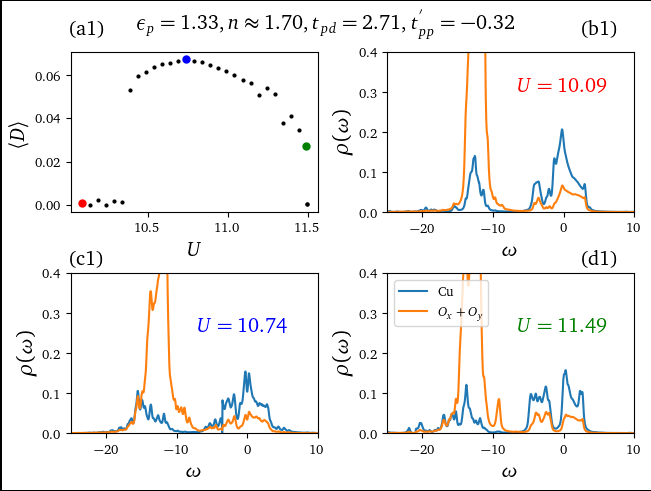

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
plt.gcf().set_size_inches(14/2.54,8/2.54)

path1 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/boucles_3bandes/boucle_U_3bande_max_U=10.975,mu=9.823,tpd=2.437,tppp=0.861,e=3.26.tsv"
data1 = np.genfromtxt(path1,names=True)
path2 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/boucle_U_3bande_max_U=10.975,mu=9.823,tpd=2.437,tppp=0.861,e=3.26/U=10.09_n=1.70.tsv"
data2 = np.genfromtxt(path2,names=True)
path3 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/boucle_U_3bande_max_U=10.975,mu=9.823,tpd=2.437,tppp=0.861,e=3.26/U=10.74223647.tsv"
data3 = np.genfromtxt(path3,names=True)
path4 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/boucle_U_3bande_max_U=10.975,mu=9.823,tpd=2.437,tppp=0.861,e=3.26/U=11.49_n=1.70.tsv"
data4 = np.genfromtxt(path4,names=True)


fig,axs = plt.subplots(2,2,layout="constrained")

axs[0][0].plot(data1["U"],abs(data1["D_ave"]),"o",markersize=2,color="black")
axs[0][0].set_xlabel("$U$",fontsize=15)
axs[0][0].set_ylabel(r"$\langle D\rangle$",fontsize=15)
axs[0][0].plot(10.74,0.0672,"o",color="blue",markersize=5)
axs[0][0].plot(10.09,0.001,"o",color="red",markersize=5)
# axs[0][0].plot(11.49,0.0002,"o",color="green",markersize=5)
axs[0][0].plot(11.49,0.027,"o",color="green",markersize=5)


axs[0][1].plot(data2["w"],data2["up_1"],label="Cu")
axs[0][1].plot(data2["w"],data2["up_2"]+data2["up_3"],label="$O_x+O_y$")
axs[0][1].set_ylim(0,0.4)
axs[0][1].set_xlim(-25,10)
axs[0][1].set_xlabel("$\omega$",fontsize=15)
axs[0][1].set_ylabel(r"$\rho(\omega)$",fontsize=15)

axs[1][0].plot(data3["w"],data3["up_1"],label="Cu")
axs[1][0].plot(data3["w"],data3["up_2"]+data3["up_3"],label="$O_x+O_y$")
axs[1][0].set_ylim(0,0.4)
axs[1][0].set_xlim(-25,10)
axs[1][0].set_xlabel("$\omega$",fontsize=15)
axs[1][0].set_ylabel(r"$\rho(\omega)$",fontsize=15)

axs[1][1].plot(data4["w"],data4["up_1"],label="Cu")
axs[1][1].plot(data4["w"],data4["up_2"]+data4["up_3"],label="$O_x+O_y$")
axs[1][1].set_ylim(0,0.4)
axs[1][1].set_xlim(-25,10)
axs[1][1].set_xlabel("$\omega$",fontsize=15)
axs[1][1].set_ylabel(r"$\rho(\omega)$",fontsize=15)
axs[1][1].legend(loc=2)



fig.text(0.8, 0.85, "$U=10.09$", weight='bold', va='top', ha='left',fontsize=15,color="red")
fig.text(0.3, 0.35, "$U=10.74$", weight='bold', va='top', ha='left',fontsize=15,color="blue")
fig.text(0.8, 0.35, "$U=11.49$", weight='bold', va='top', ha='left',fontsize=15,color="green")
fig.text(0.1, 0.97, "(a1)", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.90, 0.97, "(b1)", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.1, 0.49, "(c1)", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.90, 0.49, "(d1)", weight='bold', va='top', ha='left',fontsize=15)
fig.suptitle(r"$\epsilon_p= 1.33,n\approx1.70,t_{pd}=2.71,t_{pp}^{'}=-0.32$",fontsize=15)
fig.patch.set_linewidth(2)
fig.patch.set_edgecolor("black")
# plt.savefig("boucle_U_max_Emery.pdf")


<Figure size 551.181x314.961 with 0 Axes>

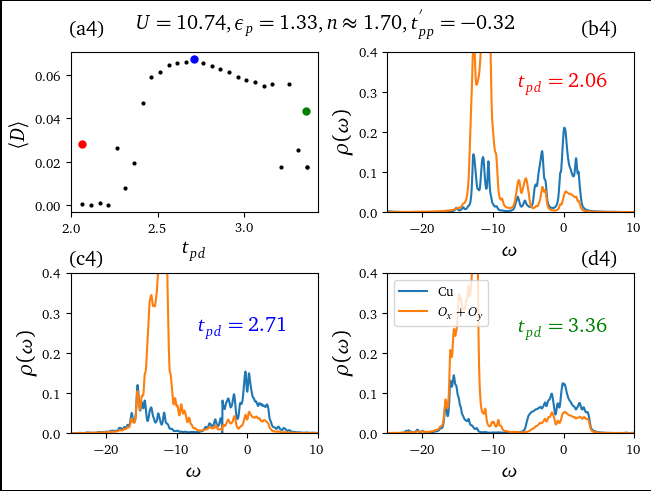

In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
plt.gcf().set_size_inches(14/2.54,8/2.54)

path1 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/boucles_3bandes/boucle_tpd_3bande_max_U=10.975,mu=9.823,tpd=2.437,tppp=0.861,e=3.26.tsv"
data1 = np.genfromtxt(path1,names=True)
path2 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/boucle_tpd_3bande_max_U=10.975,mu=9.823,tpd=2.437,tppp=0.861,e=3.26/tpd=2.06_n=1.70.tsv"
data2 = np.genfromtxt(path2,names=True)
path3 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/boucle_tpd_3bande_max_U=10.975,mu=9.823,tpd=2.437,tppp=0.861,e=3.26/tpd=2.7131637.tsv"
data3 = np.genfromtxt(path3,names=True)
path4 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/boucle_tpd_3bande_max_U=10.975,mu=9.823,tpd=2.437,tppp=0.861,e=3.26/tpd=3.36_n=1.70.tsv"
data4 = np.genfromtxt(path4,names=True)


fig,axs = plt.subplots(2,2,layout="constrained")

axs[0][0].plot(data1["tpd"],abs(data1["D_ave"]),"o",markersize=2,color="black")
axs[0][0].set_xlabel("$t_{pd}$",fontsize=15)
axs[0][0].set_ylabel(r"$\langle D\rangle$",fontsize=15)
axs[0][0].plot(2.71,0.0672,"o",color="blue",markersize=5)
axs[0][0].plot(2.06,0.028,"o",color="red",markersize=5)
axs[0][0].plot(3.36,0.0435,"o",color="green",markersize=5)


axs[0][1].plot(data2["w"],data2["up_1"],label="Cu")
axs[0][1].plot(data2["w"],data2["up_2"]+data2["up_3"],label="$O_x+O_y$")
axs[0][1].set_ylim(0,0.4)
axs[0][1].set_xlim(-25,10)
axs[0][1].set_xlabel("$\omega$",fontsize=15)
axs[0][1].set_ylabel(r"$\rho(\omega)$",fontsize=15)

axs[1][0].plot(data3["w"],data3["up_1"],label="Cu")
axs[1][0].plot(data3["w"],data3["up_2"]+data3["up_3"],label="$O_x+O_y$")
axs[1][0].set_ylim(0,0.4)
axs[1][0].set_xlim(-25,10)
axs[1][0].set_xlabel("$\omega$",fontsize=15)
axs[1][0].set_ylabel(r"$\rho(\omega)$",fontsize=15)

axs[1][1].plot(data4["w"],data4["up_1"],label="Cu")
axs[1][1].plot(data4["w"],data4["up_2"]+data4["up_3"],label="$O_x+O_y$")
axs[1][1].set_ylim(0,0.4)
axs[1][1].set_xlim(-25,10)
axs[1][1].set_xlabel("$\omega$",fontsize=15)
axs[1][1].set_ylabel(r"$\rho(\omega)$",fontsize=15)
axs[1][1].legend(loc=2)



fig.text(0.8, 0.86, "$t_{pd}=2.06$", weight='bold', va='top', ha='left',fontsize=15,color="red")
fig.text(0.3, 0.35, "$t_{pd}=2.71$", weight='bold', va='top', ha='left',fontsize=15,color="blue")
fig.text(0.8, 0.35, "$t_{pd}=3.36$", weight='bold', va='top', ha='left',fontsize=15,color="green")
fig.text(0.1, 0.97, "(a4)", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.90, 0.97, "(b4)", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.1, 0.49, "(c4)", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.90, 0.49, "(d4)", weight='bold', va='top', ha='left',fontsize=15)
fig.suptitle(r"$U=10.74,\epsilon_p= 1.33,n\approx1.70,t_{pp}^{'}=-0.32$",fontsize=15)
fig.patch.set_linewidth(2)
fig.patch.set_edgecolor("black")
# plt.savefig("boucle_tpd_max_Emery.pdf")

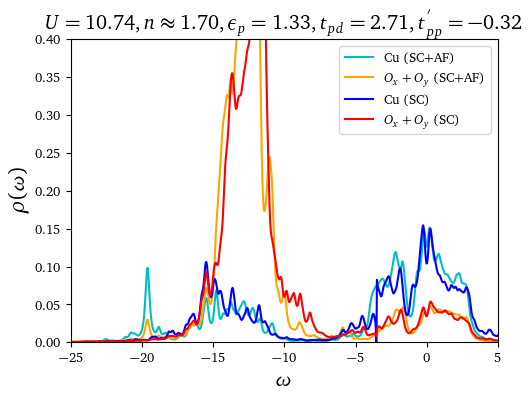

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys


U_dep = 4
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
plt.gcf().set_size_inches(14/2.54,10/2.54)

path1 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/quick/Emery_model_max_SC+AF.tsv"
data1 = np.genfromtxt(path1,names=True)
path2 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/DOS/boucle_U_3bande_max_U=10.975,mu=9.823,tpd=2.437,tppp=0.861,e=3.26/U=10.74223647.tsv"
data2 = np.genfromtxt(path2,names=True)


plt.plot(data1["w"],data1["up_1"],color="c",label="Cu (SC+AF)")
plt.plot(data1["w"],data1["up_2"]+data1["up_3"],color="orange",label="$O_x+O_y$ (SC+AF)")

plt.plot(data2["w"],data2["up_1"],color="blue",label="Cu (SC)")
plt.plot(data2["w"],data2["up_2"]+data2["up_3"],color="red",label="$O_x+O_y$ (SC)")
plt.ylim(0,0.4)
plt.xlim(-25,5)
plt.xlabel("$\omega$",fontsize=15)
plt.ylabel(r"$\rho(\omega)$",fontsize=15)
plt.title(r"$U=10.74,n\approx1.70,\epsilon_p=1.33,t_{pd}=2.71,t_{pp}^{'}=-0.32$",fontsize=15)
# plt.title(r"$U=10.74,n\approx0.1,\epsilon_p=1.33,t_{pd}=2.71,t_{pp}^{'}=-0.32$",fontsize=15)
plt.legend(fontsize=10)
plt.savefig("DOS_Emery_SC_vs_AF.pdf")
# plt.savefig("DOS_Emery_SC_vs_AF_seminaire.pdf")
plt.show()

<Figure size 551.181x314.961 with 0 Axes>

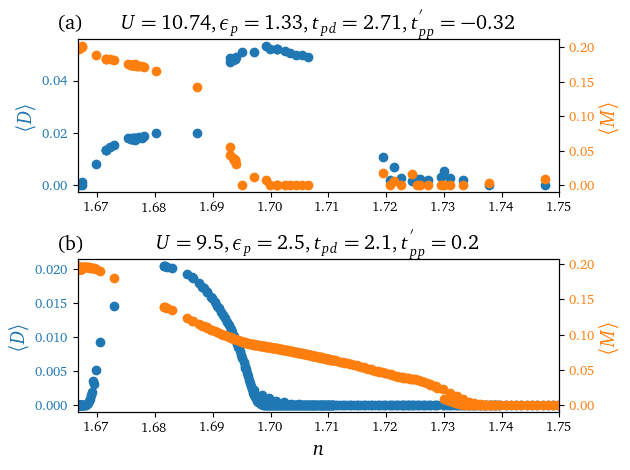

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
plt.gcf().set_size_inches(14/2.54,8/2.54)
path = "solutions/boucles_3bandes/boucle_mu_3b_max_supra_AF_out.tsv"
path2 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Dopé_électrons_2/solutions/boucle_mu/U=9.5_ep=2.5_tpd=2.1_tppp=0.2.tsv"
data = np.genfromtxt(path, names=True)
data2 = np.genfromtxt(path2,names=True)


mu,n,tpd,tppp,e = data["mu"],data['mu_ave'],data["tpd"][0],data["tppp"][0],data["e"][0]
U, D, M,n_res,n_clus = data["U"], abs(data["D_ave"]), abs(data["M_ave"]),data["mu_ave"],data["mu_1_ave"]

mu2,n2,tpd2,tppp2,e2 = data2["mu"],data2['ave_mu'],data2["tpd"][0],data2["tppp"][0],data2["ep"][0]
U2, D2, M2,n_res2 = data2["U"], abs(data2["ave_D"]), abs(data2["ave_M"]),data2["ave_mu"]



fig, ax1 = plt.subplots(2,1)


color1 = 'tab:blue'
# ax1[0].set_xlabel(r'$n$',fontsize=15)  # Étiquette de l'axe des abscisses
ax1[0].set_ylabel(r'$\langle D \rangle$', color=color1,fontsize=15)  # Étiquette de l'axe des ordonnées (gauche)
ax1[0].set_title("$U=10.74,\epsilon_p=1.33,t_{pd}=2.71,t_{pp}^{'}=-0.32$",fontsize=15)
ax1[0].plot(n_res, D, 'o', color=color1, label=r'$\langle D \rangle$')
# ax1[0].plot((n_res-(5/3))*3, D, 'o', color=color1, label=r'$\langle D \rangle$')
ax1[0].tick_params(axis='y', labelcolor=color1)
ax2 = ax1[0].twinx()
color2 = 'tab:orange'
ax2.set_ylabel(r'$\langle M\rangle$', color=color2,fontsize=15) 
ax2.plot(n_res, M, 'o', color=color2, label=r'$<M>$')
# ax2.plot((n_res-(5/3))*3, M, 'o', color=color2, label=r'$<M>$')
ax2.tick_params(axis='y', labelcolor=color2)



ax1[1].set_xlabel(r'$n$',fontsize=15)  # Étiquette de l'axe des abscisses
ax1[1].set_ylabel(r'$\langle D\rangle$', color=color1,fontsize=15)  # Étiquette de l'axe des ordonnées (gauche)
ax1[1].set_title("$U=9.5,\epsilon_p=2.5,t_{pd}=2.1,t_{pp}^{'}=0.2$",fontsize=15)
ax1[1].plot(n_res2, D2, 'o', color=color1, label=r'$\langle D\rangle$')
# ax1[1].plot((n_res2-(5/3))*3, D2, 'o', color=color1, label=r'$\langle D\rangle$')
ax1[1].tick_params(axis='y', labelcolor=color1)
ax3 = ax1[1].twinx()
color2 = 'tab:orange'
ax3.set_ylabel(r'$\langle M \rangle$', color=color2,fontsize=15) 
ax3.plot(n_res2, M2, 'o', color=color2, label=r'$\langle M\rangle$')
# ax3.plot((n_res2-(5/3))*3, M2, 'o', color=color2, label=r'$\langle M\rangle$')
ax3.tick_params(axis='y', labelcolor=color2)
ax1[0].set_xlim(5/3,1.75)
ax1[1].set_xlim(5/3,1.75)
# ax1[0].set_xlim(0,0.3)
# ax1[1].set_xlim(0,0.3)

fig.tight_layout()
fig.text(0.10, 0.96, "(a)", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.10, 0.5, "(b)", weight='bold', va='top', ha='left',fontsize=15)
# plt.savefig("AF_vs_SC_Emery_solution_optim.pdf")
# plt.savefig("AF_vs_SC_Emery_solution_optim_seminaire.pdf")
plt.show()




<Figure size 551.181x354.331 with 0 Axes>

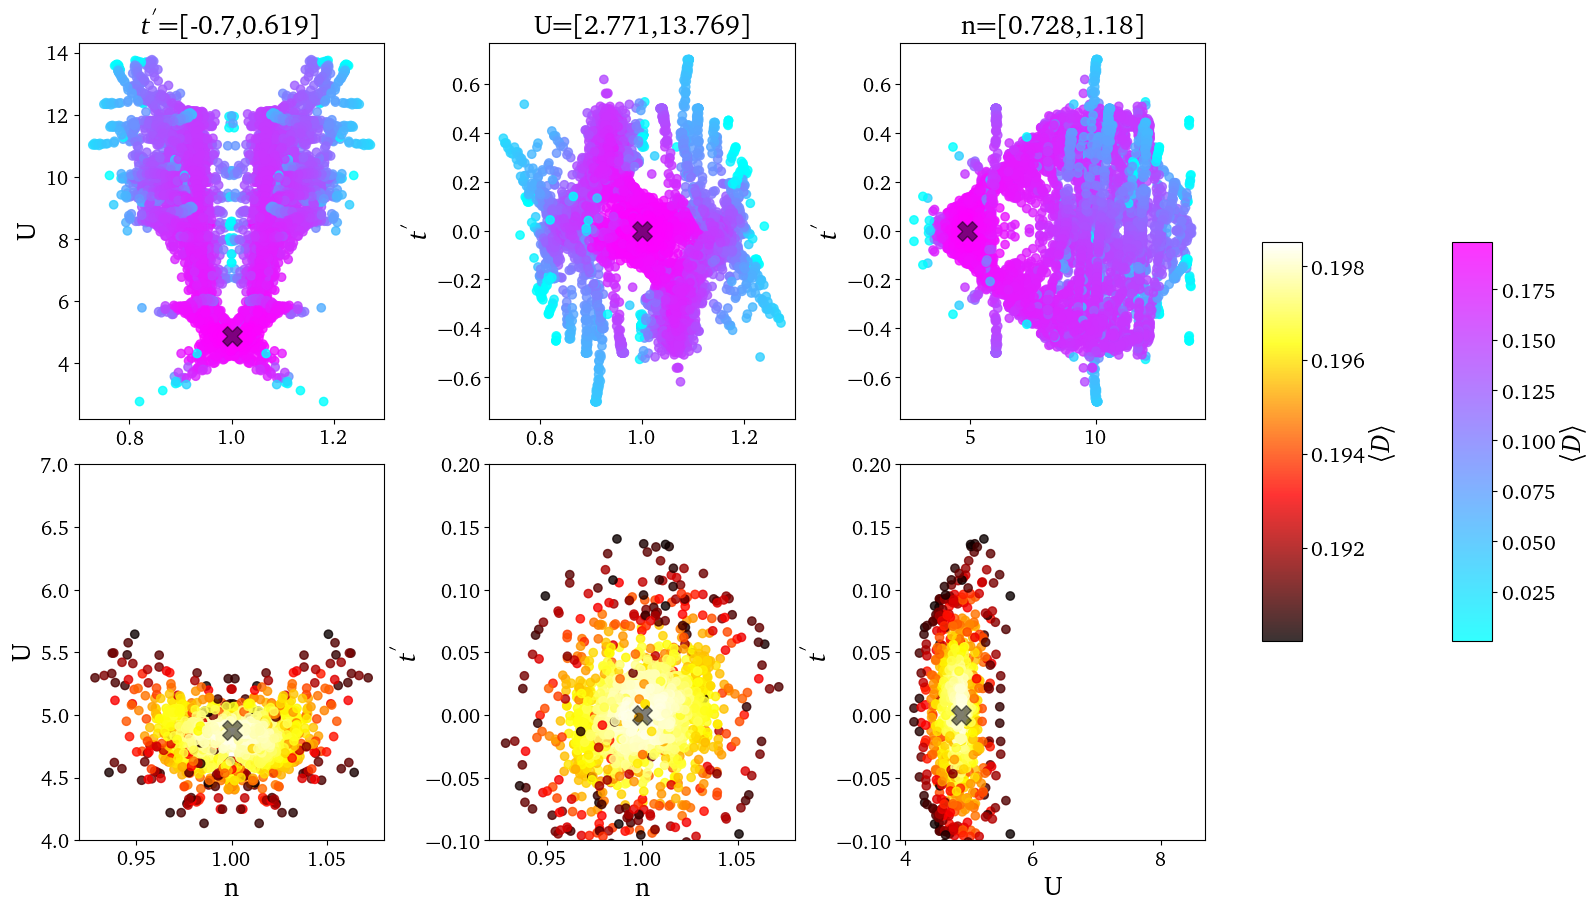

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
plt.gcf().set_size_inches(14/2.54,9/2.54)

# path1 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/Optimisation_1bande_trous/merged_file_filtered_complet_shuffle.tsv"
path1 = "/net/nfs-iq/data/lbsc/Maîtrise_LBSC/Optimisation_propre/solutions/Optimisation_1bande_trous/merged_file.tsv"
data1 = np.genfromtxt(path1, names=True)
data1 = data1[data1["D_ave"] > 0.0005]
data2 = data1[data1["D_ave"] > 0.19]
# data1 = data1[data1["tp"] > -0.01]
# data1 = data1[data1["tp"] < 0.01]

U1 = data1["U"]
mu1 = data1["mu_ave"]
tp1 = data1["tp"]

U2 = data2["U"]
mu2 = data2["mu_ave"]
tp2 = data2["tp"]

try:
    n1 = data1["mu_ave"]
    ave_D1 = abs(data1["D_ave"])
except KeyError:
    n1 = data1["ave_mu"]
    ave_D1 = abs(data1["ave_D"])

try:
    n2 = data2["mu_ave"]
    ave_D2 = abs(data2["D_ave"])
except KeyError:
    n2 = data2["ave_mu"]
    ave_D2 = abs(data2["ave_D"])

# Position du maximum
# pos_max = (4.877, 1.007, -0.004)  # (U, n, tp)
pos_max = (4.88, 1.00, 0)  # (U, n, tp)

# Création de la figure et des sous-figures
# fig, ax = plt.subplots(1, 3, figsize=(16, 9))
fig, ax = plt.subplots(2, 3, layout="constrained",figsize=(16, 9))

# Création de la carte de couleurs
my_cmap1 = plt.get_cmap('cool')
my_cmap2 = plt.get_cmap('hot')

# Graphiques
sctt1 = ax[0][0].scatter(n1, U1, alpha=0.8, c=ave_D1, cmap=my_cmap1, marker='o')
sctt11 = ax[0][0].scatter(2-n1, U1, alpha=0.8, c=ave_D1, cmap=my_cmap1, marker='o')
sctt2 = ax[0][1].scatter(n1, tp1, alpha=0.8, c=ave_D1, cmap=my_cmap1, marker='o')
sctt22 = ax[0][1].scatter(2-n1, -tp1, alpha=0.8, c=ave_D1, cmap=my_cmap1, marker='o')
sctt5 = ax[0][2].scatter(U1, tp1, alpha=0.8, c=ave_D1, cmap=my_cmap1, marker='o')
sctt55 = ax[0][2].scatter(U1, -tp1, alpha=0.8, c=ave_D1, cmap=my_cmap1, marker='o')

sctt7 = ax[1][0].scatter(n2, U2, alpha=0.8, c=ave_D2, cmap=my_cmap2, marker='o')
sctt77 = ax[1][0].scatter(2-n2, U2, alpha=0.8, c=ave_D2, cmap=my_cmap2, marker='o')
sctt8 = ax[1][1].scatter(n2, tp2, alpha=0.8, c=ave_D2, cmap=my_cmap2, marker='o')
sctt88 = ax[1][1].scatter(2-n2, -tp2, alpha=0.8, c=ave_D2, cmap=my_cmap2, marker='o')
sctt9 = ax[1][2].scatter(U2, tp2, alpha=0.8, c=ave_D2, cmap=my_cmap2, marker='o')
sctt99 = ax[1][2].scatter(U2, -tp2, alpha=0.8, c=ave_D2, cmap=my_cmap2, marker='o')


sctt3 = ax[0][0].scatter(pos_max[1], pos_max[0], alpha=0.5, color = "black",marker='X',s=200)
sctt4 = ax[0][1].scatter(pos_max[1], pos_max[2], alpha=0.5, color = "black",marker='X',s=200)
sctt6 = ax[0][2].scatter(pos_max[0], pos_max[2], alpha=0.5, color = "black",marker='X',s=200)
sctt10 = ax[1][0].scatter(pos_max[1], pos_max[0], alpha=0.5, color = "black",marker='X',s=200)
sctt11 = ax[1][1].scatter(pos_max[1], pos_max[2], alpha=0.5, color = "black",marker='X',s=200)
sctt12 = ax[1][2].scatter(pos_max[0], pos_max[2], alpha=0.5, color = "black",marker='X',s=200)


# Titres et labels
ax[0][1].set_title(f"U=[{round(min(U1), 3)},{round(max(U1), 3)}]", fontsize=20)
ax[0][2].set_title(f"n=[{round(min(n1), 3)},{round(max(n1), 3)}]", fontsize=20)
ax[0][0].set_title("$t^{'}$" + f"=[{round(min(tp1), 3)},{round(max(tp1), 3)}]", fontsize=20)

# fig.supxlabel('n', fontweight='bold', fontsize=20)
ax[0][0].set_ylabel('U', fontweight='bold', fontsize=20)
ax[0][1].set_ylabel("$t^{'}$", fontweight='bold', fontsize=20)
ax[1][0].set_ylabel('U', fontweight='bold', fontsize=20)
ax[1][1].set_ylabel("$t^{'}$", fontweight='bold', fontsize=20)
ax[1][0].set_xlabel('n', fontweight='bold', fontsize=20)
ax[1][1].set_xlabel("n", fontweight='bold', fontsize=20)
ax[0][2].set_ylabel("$t^{'}$", fontweight='bold', fontsize=20)
ax[1][2].set_ylabel("$t^{'}$", fontweight='bold', fontsize=20)
ax[1][2].set_xlabel("U", fontweight='bold', fontsize=20)

ax[1][0].set_ylim(4,7)
ax[1][1].set_ylim(-0.1,0.2)
ax[1][2].set_ylim(-0.1,0.2)

plt.rcParams.update({'xtick.labelsize': 15, 'ytick.labelsize': 15})
for rang in range(2):
    for col in range(3):
        ax[rang][col].tick_params(axis='both', labelsize=15)
cbar = fig.colorbar(sctt2, ax=ax, shrink=0.5, aspect=10, label='$<D>$')
cbar2 = fig.colorbar(sctt7, ax=ax, shrink=0.5, aspect=10, label='$<D>$')
cbar.set_label(r'$\langle D \rangle$', fontsize=20)
cbar.ax.tick_params(labelsize=16)
cbar2.set_label(r'$\langle D \rangle$', fontsize=20)
cbar2.ax.tick_params(labelsize=16)  
# plt.savefig("Utp_vs_n_optim1bande_D_filtre.pdf")
plt.show()
